In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Generating the Data

In [3]:
# A simple function generating data of predictors and responses!
def gen_data(filename='kc_house_data.csv', limit=10):
    
    #Total features to use
    n = 2
    
    #Reading the data from csv
    data = np.genfromtxt('kc_house_data.csv', delimiter=',')
    
    #Reading two features bedrooms and sqft_living
    features = data[1:limit+1, [5,3]]
        
    #Adding constant feature x0
    x = np.hstack((np.ones((limit, 1)), features))
    
    #Reading the predicting variable - price 
    y = data[1:limit+1, 2]
    y = y.reshape(len(y), 1)
    
    return x, y, n

### Normalization Function - Calculation

In [4]:
def calculate_normalized(feature):
    
    res = np.subtract(feature, np.mean(feature))
    range_feature = np.max(feature)-np.min(feature)
    res = np.divide(res, range_feature)
    
    return res

### Normalization Function - Wrapper

In [5]:
def normalize(x, y):
    
    #x.shape[1] = no. of columns = no, features
    #starting from 1 to skip constant feature
    for i in range(1, x.shape[1]):
        x[:, i] = calculate_normalized(x[:, i])
    
    #normalizing prediction variable  
    y = calculate_normalized(y)
    
    return x, y


### Hypothesis Function

In [6]:
def calculate_hypothesis(x, params):
    
    h_of_x = np.dot(x, params)
    
    return h_of_x

### Cost Function 

In [7]:
def cost_function(x, y, params):
    
    #Total training examples
    m = len(y)
    
    #Calculating hypothesis (predictions)
    h = calculate_hypothesis(x, params)
    
    #Calculating cost
    diff = np.subtract(h, y)
    squared_sum = np.sum(np.square(diff))
    cost = np.divide(squared_sum, m*2)
        
    return cost

### Function to calculate Sum of Errors (formula) 

In [8]:
def calculate_sum_of_errors(x, y, params, xi):
    
    xi = xi.reshape(len(xi), 1)
    
    #hypothesis h(x)
    h_of_x = calculate_hypothesis(x, params)
        
    #performing calculations
    diff = np.subtract(h_of_x, y)
    res = np.multiply(diff, xi)
    sum_of_errors = np.sum(res)

    return sum_of_errors

### Gradient Descent Function

In [9]:
def gradient_descent(x, y, params, alpha=0.001, precision=0.01, iterations = 1000):
    
    #Total count of training exmaples and features
    m = len(y)
    n = len(params)
    
    #Creating a list for storing our cost function history
    cost_history = list()
    
    #Creating a vector for storing our parameter caches
    parameterCaches = np.zeros((n, 1))
    
    first_iteration = True
    its = 0
    
    while True:
        
        #Caching the new parameters for simultaneous update
        for j in range(0, n):
            parameterCaches[j] = params[j] - alpha*(1/m)*calculate_sum_of_errors(x, y, params, x[:, j])
        
        #Fail-safe
        if(sum(1 for val in parameterCaches if val < 0) >0):
            print("Fail safe activated")
            break
        
        #Updating the parameters simultaneously
        for j in range(0, n):
            params[j] = parameterCaches[j]
        
        #Keeping track of the history of cost
        current_cost = cost_function(x, y, params)
        
        print("theta0 = {} | theta1 = {} | theta2 = {} | cost = {} | iterations = {}".format(params[0],params[1],params[2], current_cost, its))
        print()
        
        if not(first_iteration) and ((cost_history[-1] - current_cost) <= precision):
            print("Precision naileddd!")
            break
                
        if first_iteration:
            first_iteration = False
        
        cost_history.append(current_cost)
        
        its +=1
        
        if its == iterations:
            break
            
    return params, cost_history, its
    

In [10]:
x, y, n = gen_data(limit=100)
params = np.ones((n+1, 1)) #theta0 theta1 theta2

In [11]:
#x, y = normalize(x, y)

Text(0,0.5,'price')

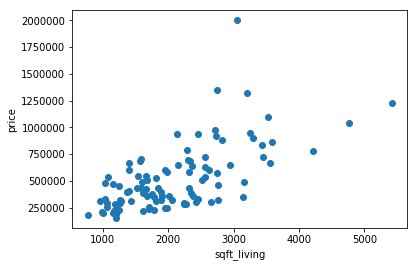

In [12]:
plt.scatter(x[:, 1], y)
plt.xlabel("sqft_living")
plt.ylabel("price")

Text(0,0.5,'price')

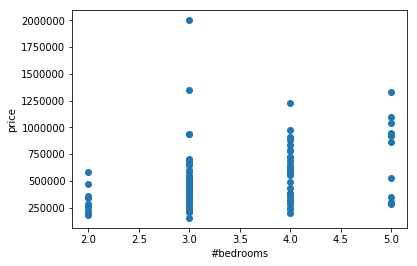

In [13]:
plt.scatter(x[:, 2], y)
plt.xlabel("#bedrooms")
plt.ylabel("price")

In [14]:
params = np.ones((n+1, 1)) #theta0 theta1 theta2
params, cost_hist, its = gradient_descent(x, y, params, alpha=0.000000001, precision= 0.0000001)

theta0 = [1.00051706] | theta1 = [2.248027] | theta2 = [1.001842] | cost = 177848507639.82086 | iterations = 0

theta0 = [1.00103151] | theta1 = [3.4896942] | theta2 = [1.00367466] | cost = 176310694818.43887 | iterations = 1

theta0 = [1.00154336] | theta1 = [4.72503403] | theta2 = [1.00549804] | cost = 174788515061.02814 | iterations = 2

theta0 = [1.00205264] | theta1 = [5.95407873] | theta2 = [1.00731218] | cost = 173281809445.32858 | iterations = 3

theta0 = [1.00255935] | theta1 = [7.17686037] | theta2 = [1.00911712] | cost = 171790420664.64868 | iterations = 4

theta0 = [1.0030635] | theta1 = [8.39341087] | theta2 = [1.01091292] | cost = 170314193011.4416 | iterations = 5

theta0 = [1.00356511] | theta1 = [9.60376198] | theta2 = [1.01269962] | cost = 168852972361.04913 | iterations = 6

theta0 = [1.0040642] | theta1 = [10.8079453] | theta2 = [1.01447727] | cost = 167406606155.6099 | iterations = 7

theta0 = [1.00456077] | theta1 = [12.00599225] | theta2 = [1.01624591] | cost = 1

theta0 = [1.08360406] | theta1 = [200.53483362] | theta2 = [1.29623501] | cost = 31820833870.94868 | iterations = 329

theta0 = [1.08370434] | theta1 = [200.76605641] | theta2 = [1.29658459] | cost = 31767505983.868896 | iterations = 330

theta0 = [1.08380414] | theta1 = [200.99610092] | theta2 = [1.29693244] | cost = 31714720216.256805 | iterations = 331

theta0 = [1.08390346] | theta1 = [201.22497315] | theta2 = [1.29727857] | cost = 31662471057.04618 | iterations = 332

theta0 = [1.0840023] | theta1 = [201.45267907] | theta2 = [1.29762299] | cost = 31610753051.195053 | iterations = 333

theta0 = [1.08410066] | theta1 = [201.67922464] | theta2 = [1.29796571] | cost = 31559560799.116207 | iterations = 334

theta0 = [1.08419856] | theta1 = [201.90461575] | theta2 = [1.29830673] | cost = 31508888956.113438 | iterations = 335

theta0 = [1.08429598] | theta1 = [202.1288583] | theta2 = [1.29864607] | cost = 31458732231.823536 | iterations = 336

theta0 = [1.08439293] | theta1 = [202.351958

theta0 = [1.10001796] | theta1 = [236.45459314] | theta2 = [1.35208892] | cost = 26802776240.37242 | iterations = 636

theta0 = [1.10004321] | theta1 = [236.50277336] | theta2 = [1.35216984] | cost = 26800460813.470703 | iterations = 637

theta0 = [1.10006837] | theta1 = [236.55070807] | theta2 = [1.3522504] | cost = 26798168924.683826 | iterations = 638

theta0 = [1.10009342] | theta1 = [236.59839851] | theta2 = [1.35233061] | cost = 26795900334.728516 | iterations = 639

theta0 = [1.10011838] | theta1 = [236.64584592] | theta2 = [1.35241045] | cost = 26793654806.754044 | iterations = 640

theta0 = [1.10014323] | theta1 = [236.69305155] | theta2 = [1.35248994] | cost = 26791432106.317394 | iterations = 641

theta0 = [1.10016799] | theta1 = [236.74001662] | theta2 = [1.35256908] | cost = 26789232001.358917 | iterations = 642

theta0 = [1.10019265] | theta1 = [236.78674237] | theta2 = [1.35264786] | cost = 26787054262.177982 | iterations = 643

theta0 = [1.10021722] | theta1 = [236.8332

theta0 = [1.10468914] | theta1 = [243.84654323] | theta2 = [1.36597925] | cost = 26585851287.302643 | iterations = 934

theta0 = [1.10469896] | theta1 = [243.85705499] | theta2 = [1.36600488] | cost = 26585741070.940914 | iterations = 935

theta0 = [1.10470875] | theta1 = [243.86751319] | theta2 = [1.36603043] | cost = 26585631975.01289 | iterations = 936

theta0 = [1.10471853] | theta1 = [243.87791809] | theta2 = [1.36605591] | cost = 26585523988.12851 | iterations = 937

theta0 = [1.10472828] | theta1 = [243.88826997] | theta2 = [1.36608131] | cost = 26585417099.01346 | iterations = 938

theta0 = [1.10473801] | theta1 = [243.89856909] | theta2 = [1.36610663] | cost = 26585311296.508087 | iterations = 939

theta0 = [1.10474771] | theta1 = [243.90881574] | theta2 = [1.36613187] | cost = 26585206569.56613 | iterations = 940

theta0 = [1.1047574] | theta1 = [243.91901017] | theta2 = [1.36615704] | cost = 26585102907.253674 | iterations = 941

theta0 = [1.10476707] | theta1 = [243.9291526

### Cost History against iterations

Text(0,0.5,'Cost')

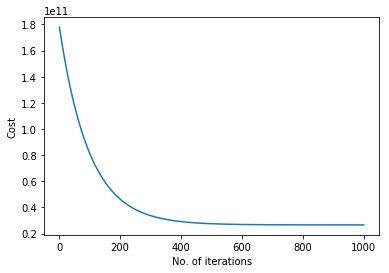

In [15]:
cost_hist = np.array(cost_hist)
iterations = np.arange(1, its+1)

plt.plot(iterations, cost_hist)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")

In [16]:
print("theta0 = {} | theta1 = {} | theta2 = {}".format(params[0], params[1], params[2]))

theta0 = [1.10528607] | theta1 = [244.42942627] | theta2 = [1.36749803]


Text(0,0.5,'Price')

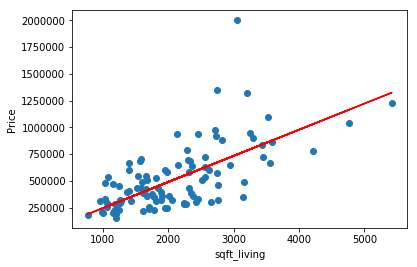

In [17]:
price = calculate_hypothesis(x, params)
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], price, color='r')
plt.xlabel("sqft_living")
plt.ylabel("Price")